

# Project 1: SAT Analysis
_By **Dustin Stewart**_

#### 
## Problem Statement

#### _Already disadvantaged students are being further disadvantaged by the use of the SAT in admissions._
## 

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Conclusions and Recommendations](#Conclusions)

# 
### Background

The SAT was changed in the early 2000's after criticism from the University of California president. ([_Washington Post_](https://www.washingtonpost.com/education/2019/10/18/record-number-colleges-drop-satact-admissions-requirement-amid-growing-disenchantment-with-standardized-tests/)) They added a writing portion to the test that was supposed to increase scores for those from diverse backgrounds. It probably made things worse. Students started attending SAT programs that costed thousands of dollars and would teach them how to "game" the test. In some cases, parents would even pay hundreds of thousands of dollars to fake SAT scores so their children could attend top universities:

>As part of an investigation they called Operation Varsity Blues, federal prosecutors last week charged some 50 people, including famous Hollywood actresses and wealthy financiers. The alleged schemes included hiring impostors to take SAT and ACT exams, or rigging the test by asking for additional time to take it even when that wasn’t necessary. 
    - *Valerie Strauss, [Washington Post](https://www.washingtonpost.com/education/2019/03/19/is-it-finally-time-get-rid-sat-act-college-admissions-tests/)*

In 2017, College Board removed the writing portion and attempted once again to make the test more equitable. This report will analyze the data before the change and after the change to determine if College Board was successful in making the SAT more 
# 
# 

# 
#### Functions: 

In [219]:
def mean_function(array_of_values):
    return sum(array_of_values)/(len(array_of_values))

In [220]:
def standard_deviation(array):
    sum_of_deviations = 0
    for number in array:
        sum_of_deviations += int((number - mean_function(array))**2)
    return (sum_of_deviations/len(array))**(1/2)

In [221]:
def percent_converter(string):
    new_string = string.replace('%', '')   
    return float(new_string)/100
percent_converter('30.5%')

0.305

# 
# 
# Data Import and Cleaning
##### 

##### Changing max column amount for my larger datasets:  

In [222]:
# Imports:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [223]:
pd.set_option('display.max_columns', None)

## 
## Importing Data Sets

###### 
#### Import SAT Results Data for 2016:
###### 

In [224]:
SAT16 = pd.read_excel('../data/sat16results.xlsx')
SAT16.head()

,rtype,sname,dname,cname,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrit,NumGE1500,PctGE1500
0,X,NaN,NaN,NaN,492835,214262,484,494,477,89840,41.93
1,C,NaN,NaN,Alameda,16662,8611,517,534,515,4696,54.53
2,D,NaN,Alameda County Office of Education,Alameda,263,95,395,378,388,6,6.32
3,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,88,92,391,376,386,5,5.43
4,D,NaN,Alameda Unified,Alameda,858,472,527,543,514,301,63.77


###### 
#### Import SAT Results Data for 2017:
###### 

In [225]:
SAT17 = pd.read_excel('../data/sat17results.xlsx')
SAT17.head(3)

,cds,Ccode,CDcode,Scode,rtype,sname,dname,cname,enroll12,NumTstTakr,NumCurrElaBenchmark,NumPreElaBenchmark,TotNumElaBenchmark,PctElaBenchmark,NumCurrMathBenchmark,NumPreMathBenchmark,TotNumMathBenchmark,PctMathBenchmark,TotNumBothBenchmark,PctBothBenchmark
0,0,0,0,0,X,NaN,NaN,NaN,484169,221433,144893,15103,159996,72.25,98504,13887,112391,50.76,107173,48.4
1,1000000000000,1,100000,0,C,NaN,NaN,Alameda,16638,9029,5407,1376,6783,75.12,4033,1337,5370,59.48,5147,57.01
2,1100170000000,1,110017,0,D,NaN,Alameda County Office of Education,Alameda,253,83,28,0,28,33.73,9,0,9,10.84,9,10.84


###### 
#### Import SAT Results Data for 2018:
###### 

In [226]:
SAT18 = pd.read_excel('../data/sat18results.xlsx')
SAT18.head(3)

,cds,Ccode,CDcode,Scode,rtype,sname,dname,cname,enroll12,NumTstTakr,NumCurrElaBenchmark,NumPreElaBenchmark,TotNumElaBenchmark,PctElaBenchmark,NumCurrMathBenchmark,NumPreMathBenchmark,TotNumMathBenchmark,PctMathBenchmark,TotNumBothBenchmark,PctBothBenchmark,year
0,0,0,0,0,X,NaN,NaN,NaN,489221,236492,167556,442,167998,71.04,119412,423,119835,50.67,114161,48.27,2017-18
1,1000000000000,1,100000,0,C,NaN,NaN,Alameda,17476,10058,7694,44,7738,76.93,6160,44,6204,61.68,5981,59.47,2017-18
2,1100170000000,1,110017,0,D,NaN,Alameda County Office of Education,Alameda,249,90,46,0,46,51.11,20,0,20,22.22,17,18.89,2017-18


###### 
#### Import Poverty Level Data for 2016:
###### 

In [227]:
poverty = pd.read_csv('../data/povertybyschooldistrict.csv')
poverty.head(3)

,district,poverty level (2016)
0,Acton-Agua Dulce Unified,8.8
1,Ross Valley Elementary,3.5
2,Cuyama Joint Unified,22.3


# 
#  
# Cleaning Data
###### 

###### 
### 1.  Clean SAT16 Data
###### 

###### 
##### Remove rows that don't have data:
###### 

In [228]:
SAT16 = SAT16[SAT16['NumTstTakr'] > 15] # exclude rows with less than 15 test takers because those numbers were excluded to preserve identities

###### 
##### Rename columns to make dataframe easier to understand:
###### 

In [229]:
SAT16 = SAT16.rename(columns = {"cname":"county"})
SAT16 = SAT16.rename(columns = {"dname":"district"})  #renaming of columns for clearer understanding
SAT16 = SAT16.rename(columns = {"sname":"school"})
SAT16 = SAT16.rename(columns = {"enroll12":"number of students"})
SAT16 = SAT16.rename(columns = {"NumTstTakr":"number of test takers"})
SAT16 = SAT16.rename(columns = {"AvgScrRead":"average reading score"})
SAT16 = SAT16.rename(columns = {"AvgScrMath":"average math score"})
SAT16 = SAT16.rename(columns = {"NumGE1500":"number met benchmark"})
SAT16 = SAT16.rename(columns = {"PctGE1500":"% met benchmark"})

###### 
##### Exclude rows that are not district level data:
###### 

In [230]:
SAT16 = SAT16[SAT16.rtype.str.contains("D")] # keeping only rows that have 'D' in the rtype column because they represent districts https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p

######  
##### Drop unnecessary columns for our analysis:
###### 

In [231]:
SAT16 = SAT16.drop(columns = ['rtype', 'school', 'AvgScrWrit']) #dropping unneccessary columns

######  
##### Convert column values to numerical if their type is incorrect:
###### 

In [232]:
SAT16[['number of students', 'number of test takers', 'average reading score',
       'average math score', 'number met benchmark', '% met benchmark'
      ]] = SAT16[['number of students', 'number of test takers', 'average reading score',        # lifesaving info: https://www.geeksforgeeks.org/change-data-type-for-one-or-more-columns-in-pandas-dataframe/
       'average math score', 'number met benchmark', '% met benchmark'
                 ]].apply(pd.to_numeric)

######  
##### Calculating other useful variables:
######  

In [233]:
SAT16["combined average"] = SAT16["average reading score"] + SAT16["average math score"]
SAT16["participation rate"] = SAT16["number of test takers"] / SAT16["number of students"]               # creating a new column for the combined math and english sat scores (writing ignored in order to most closely align with new sat format)

######  
##### Dropping further columns that won't be as useful:
######  

In [234]:
SAT16 = SAT16.drop(columns = ['number of test takers', 'average reading score', 'average math score', 'number met benchmark', 'county']) #dropping unneccessary columns

######  
##### Appending the year to columns that are numeric:
######  

In [235]:
SAT16.columns = [column + ' (2016)' for column in SAT16.columns]
SAT16 = SAT16.rename(columns = {"district (2016)":"district"})            # appending 2018 to the data to easily differentiate between the years

######  
##### The resulting dataframe for SAT16:
######  

In [236]:
SAT16.head()

,district,number of students (2016),% met benchmark (2016),combined average (2016),participation rate (2016)
2,Alameda County Office of Education,263,6.32,773,0.361217
4,Alameda Unified,858,63.77,1070,0.550117
11,Albany City Unified,300,82.68,1192,0.596667
13,Berkeley Unified,922,65.87,1120,0.587852
16,Castro Valley Unified,789,64.23,1093,0.520913


###### 
### 2.  Clean SAT17 Data
###### 

###### 
##### Remove rows that don't have data:
###### 

In [237]:
SAT17 = SAT17[SAT17['NumTstTakr'] > 15] # exclude rows with less than 15 test takers because those numbers were excluded to preserve identities

###### 
##### Exclude rows that are not district level data:
###### 

In [238]:
SAT17 = SAT17[SAT17.rtype.str.contains("D")]    # keeping only rows that contain districts

###### 
##### Get rid of unnecessary rows:
###### 

In [239]:
SAT17 = SAT17.drop(columns = ['cds', 'Ccode', 'CDcode', 'Scode', 'sname', 'rtype']) #dropping unneccessary columns

###### 
##### Rename columns to make dataframe easier to understand:
###### 

In [240]:
SAT17 = SAT17.rename(columns = {"cname":"county"})
SAT17 = SAT17.rename(columns = {"dname":"district"})                                   #renaming columns for better understanding
SAT17 = SAT17.rename(columns = {"enroll12":"number of students"})
SAT17 = SAT17.rename(columns = {"NumTstTakr":"number of test takers"})
SAT17 = SAT17.rename(columns = {"PctElaBenchmark":"% met english benchmark"})
SAT17 = SAT17.rename(columns = {"PctMathBenchmark":"% met math benchmark"})
SAT17 = SAT17.rename(columns = {"PctBothBenchmark":"% met both benchmarks"})
SAT17 = SAT17.rename(columns = {"NumCurrElaBenchmark":"met current english benchmark"})
SAT17 = SAT17.rename(columns = {"NumPreElaBenchmark":"met previous english benchmark"})
SAT17 = SAT17.rename(columns = {"TotNumElaBenchmark":"total met english benchmark"})
SAT17 = SAT17.rename(columns = {"NumCurrMathBenchmark":"met current math benchmark"})
SAT17 = SAT17.rename(columns = {"NumPreMathBenchmark":"met previous math benchmark"})
SAT17 = SAT17.rename(columns = {"TotNumMathBenchmark":"total met math benchmark"})
SAT17 = SAT17.rename(columns = {"TotNumBothBenchmark":"total met both benchmarks"})

######  
##### Convert column values to numerical if their type is incorrect:
###### 

In [241]:
SAT17[['number of students', 'number of test takers', "% met english benchmark", "% met math benchmark", "% met both benchmarks", "met current english benchmark", "met previous english benchmark", 
       "total met english benchmark", "met current math benchmark", "met previous math benchmark", "total met math benchmark", "total met both benchmarks"
       ]] = SAT17[['number of students', 'number of test takers', "% met english benchmark", "% met math benchmark", "% met both benchmarks", "met current english benchmark", "met previous english benchmark", 
       "total met english benchmark", "met current math benchmark", "met previous math benchmark", "total met math benchmark", "total met both benchmarks"]].apply(pd.to_numeric)

######  
##### Calculating other useful variables:
######  

In [242]:
SAT17["participation rate"] = SAT17["number of test takers"] / SAT17["number of students"]

######  
##### Further dropping columns that won't be useful in our analysis:
######  

In [243]:
SAT17 = SAT17.drop(columns = ['number of students', 'number of test takers', '% met english benchmark', 'total met english benchmark', 
                              'met previous math benchmark', 'met previous english benchmark', '% met math benchmark', 'total met math benchmark', 
                              'total met both benchmarks', 'county', 'met current english benchmark', 'met current math benchmark']) #dropping unneccessary columns

######  
##### Appending the year to columns that are numeric:
######  

In [244]:
SAT17.columns = [column + ' (2017)' for column in SAT17.columns]      
SAT17 = SAT17.rename(columns = {"district (2017)":"district"})            # appending 2017 to the data to easily differentiate between the two years

######  
##### The resulting dataframe for SAT17:
######  

In [245]:
SAT17.head()

,district,% met both benchmarks (2017),participation rate (2017)
2,Alameda County Office of Education,10.84,0.328063
4,Alameda Unified,66.67,0.543956
11,Albany City Unified,81.70,0.510000
13,Berkeley Unified,64.97,0.551066
17,Castro Valley Unified,73.72,0.527599


###### 
### 3. Clean SAT18 Data
###### 

###### 
##### Remove rows that don't have data:
###### 

In [246]:
SAT18 = SAT18[SAT18['NumTstTakr'] > 15] # exclude rows with less than 15 test takers because those numbers were excluded to preserve identities

###### 
##### Exclude rows that are not district level data:
###### 

In [247]:
SAT18 = SAT18[SAT18.rtype.str.contains("D")] # keeping only rows that contain districts because districts are the biggest determination of resources and school quality

###### 
##### Get rid of unnecessary rows:
###### 

In [248]:
SAT18 = SAT18.drop(columns = ['cds', 'Ccode', 'CDcode', 'Scode', 'sname', 'rtype', 'year']) #dropping unneccessary columns

###### 
##### Rename columns to make dataframe easier to understand:
###### 

In [249]:
SAT18 = SAT18.rename(columns = {"cname":"county"})
SAT18 = SAT18.rename(columns = {"dname":"district"})                                   #renaming columns for better understanding
SAT18 = SAT18.rename(columns = {"enroll12":"number of students"})
SAT18 = SAT18.rename(columns = {"NumTstTakr":"number of test takers"})
SAT18 = SAT18.rename(columns = {"PctElaBenchmark":"% met english benchmark"})
SAT18 = SAT18.rename(columns = {"PctMathBenchmark":"% met math benchmark"})
SAT18 = SAT18.rename(columns = {"PctBothBenchmark":"% met both benchmarks"})
SAT18 = SAT18.rename(columns = {"NumCurrElaBenchmark":"met current english benchmark"})
SAT18 = SAT18.rename(columns = {"NumPreElaBenchmark":"met previous english benchmark"})
SAT18 = SAT18.rename(columns = {"TotNumElaBenchmark":"total met english benchmark"})
SAT18 = SAT18.rename(columns = {"NumCurrMathBenchmark":"met current math benchmark"})
SAT18 = SAT18.rename(columns = {"NumPreMathBenchmark":"met previous math benchmark"})
SAT18 = SAT18.rename(columns = {"TotNumMathBenchmark":"total met math benchmark"})
SAT18 = SAT18.rename(columns = {"TotNumBothBenchmark":"total met both benchmarks"})

######  
##### Convert column values to numerical if their type is incorrect:
###### 

In [250]:
SAT18[['number of students', 'number of test takers', "% met english benchmark", "% met math benchmark", "% met both benchmarks", "met current english benchmark", "met previous english benchmark", 
       "total met english benchmark", "met current math benchmark", "met previous math benchmark", "total met math benchmark", "total met both benchmarks"
       ]] = SAT18[['number of students', 'number of test takers', "% met english benchmark", "% met math benchmark", "% met both benchmarks", "met current english benchmark", "met previous english benchmark", 
       "total met english benchmark", "met current math benchmark", "met previous math benchmark", "total met math benchmark", "total met both benchmarks"]].apply(pd.to_numeric)

######  
##### Calculating other useful variables:
######  

In [251]:
SAT18["participation rate"] = SAT18["number of test takers"] / SAT18["number of students"]

######  
##### Further dropping columns that won't be useful in our analysis:
######  

In [252]:
SAT18 = SAT18.drop(columns = ['number of students', 'number of test takers', '% met english benchmark', 'total met english benchmark', 
                              'met previous math benchmark', 'met previous english benchmark', '% met math benchmark', 'total met math benchmark', 
                              'total met both benchmarks', 'county', 'met current english benchmark', 'met current math benchmark']) #dropping unneccessary columns

######  
##### Appending the year to columns that are numeric:
###### 

In [253]:
SAT18.columns = [column + ' (2018)' for column in SAT18.columns]
SAT18 = SAT18.rename(columns = {"district (2018)":"district"})            # appending 2018 to the data to easily differentiate between the two years
SAT18 = SAT18.rename(columns = {"county (2018)":"county"})

######  
##### The resulting dataframe for SAT18:
###### 

In [254]:
SAT18.head()

,district,% met both benchmarks (2018),participation rate (2018)
2,Alameda County Office of Education,18.89,0.361446
5,Alameda Unified,70.96,0.582452
12,Albany City Unified,87.95,0.594982
14,Berkeley Unified,65.33,0.512528
18,Castro Valley Unified,76.36,0.594839


###### 
### 4. Clean poverty data
###### 

 ######  
#####  Converting percentage to float for poverty dataframe:
###### 

In [255]:
poverty['poverty level (2016)'] = poverty['poverty level (2016)']/100
poverty.head()

,district,poverty level (2016)
0,Acton-Agua Dulce Unified,0.088
1,Ross Valley Elementary,0.035
2,Cuyama Joint Unified,0.223
3,Fort Sage Unified,0.081
4,Twin Ridges Elementary,0.271


In [256]:
SAT16.dtypes

district                      object
number of students (2016)      int64
% met benchmark (2016)       float64
combined average (2016)        int64
participation rate (2016)    float64
dtype: object

# 

# Exploratory Data Analysis

# 
### Data Dictionary:

# 
|Feature|Type|Dataset|Description|
|---|---|---|---|
|**district**|*object*|CA SAT data 2016/2017/2018|A collection of schools within a certain geographic region|
|**number of students**|*integer*|CA SAT data 2016|12th grade enrollment| 
|**% met benchmark**|*float*|CA SAT data 2016/2017/2018|The percentage of students who met the performance benchmark|
|**combined average**|*integer*|CA SAT data 2016|The combined total of math and reading scores for 2016| 
|**participation rate**|*float*|CA SAT data 2016/2017/2018|The percentage of 12th graders who took the SAT|
|**poverty level**|*float*|CA SAT data 2016|Percentage of students aged 5-17 in poverty| 




### 
### Summary Statistics:
###### 

In [257]:
SAT16.describe()

,number of students (2016),% met benchmark (2016),combined average (2016),participation rate (2016)
count,419.000000,419.000000,419.000000,419.000000
mean,1153.393795,42.779666,981.081146,0.411132
std,2475.636209,20.385181,103.419123,0.168637
min,23.000000,0.000000,660.000000,0.022505
25%,207.000000,26.010000,903.500000,0.314219
50%,563.000000,41.970000,982.000000,0.396359
75%,1436.500000,57.245000,1046.000000,0.497667
max,43432.000000,92.740000,1313.000000,1.068376


There's not much to take from these early statistics, but clearly a good indication that scores and participation don't deviate too far from the mean.

In [258]:
SAT17.describe()

,% met both benchmarks (2017),participation rate (2017)
count,415.000000,415.000000
mean,49.834217,0.421416
std,20.488527,0.161555
min,0.000000,0.027157
25%,34.810000,0.326528
50%,49.230000,0.406593
75%,65.505000,0.498315
max,94.760000,1.007576


Similar statistics as 2016, but there is an increase in the mean for students who did well on the test.

In [259]:
SAT18.describe()

,% met both benchmarks (2018),participation rate (2018)
count,419.000000,419.000000
mean,49.758878,0.438659
std,20.989565,0.181443
min,2.560000,0.013934
25%,33.330000,0.336764
50%,50.000000,0.417391
75%,66.670000,0.527387
max,96.050000,1.068182


This time the mean stabilized. Why is there such fluctuation?

In [260]:
poverty.describe()

,poverty level (2016)
count,946.000000
mean,0.191054
std,0.107755
min,0.000000
25%,0.108000
50%,0.174000
75%,0.261750
max,1.000000


Not really much to gather here on its own. This dataframe is primarily to help with analyzing differences between school districts by poverty level.

#### Standard deviations:

##### Note:

In [261]:
#  Needs correcting
#  This is the comprehension using my standard deviation function to apply SD to all elements of a column. I received an error about adding int and strings. I could not fix it.
#
#   [{column:standard_deviation(column) for column in SAT16.columns if (SAT16[column].dtype == 'float64') or (SAT16[column].dtype == 'int64')}]

In [262]:
SAT16.std(axis = 0)

number of students (2016)    2475.636209
% met benchmark (2016)         20.385181
combined average (2016)       103.419123
participation rate (2016)       0.168637
dtype: float64

In [263]:
SAT17.std(axis = 0)

% met both benchmarks (2017)    20.488527
participation rate (2017)        0.161555
dtype: float64

In [264]:
SAT18.std(axis = 0)

% met both benchmarks (2018)    20.989565
participation rate (2018)        0.181443
dtype: float64

In [265]:
poverty.std(axis = 0)

poverty level (2016)    0.107755
dtype: float64

### 
##### Analysis:
The data is pretty variable with high standard deviations for almost all columns, especially compared to the mean. Overall scores are close together but that's because of very few getting really low scores.

# 
## Merging Data Frames

##### Merge poverty level with SAT results for 2016 (preserving rows that have a corresponding "district" value):

In [266]:
merged_16_poverty = pd.merge(SAT16, poverty, on = ["district"])       # merging together the dataframes in order to easily compare all of the data
merged_16_poverty.head()

,district,number of students (2016),% met benchmark (2016),combined average (2016),participation rate (2016),poverty level (2016)
0,Albany City Unified,300,82.68,1192,0.596667,0.068
1,Berkeley Unified,922,65.87,1120,0.587852,0.091
2,Castro Valley Unified,789,64.23,1093,0.520913,0.065
3,Emery Unified,50,30.77,895,0.520000,0.158
4,Fremont Unified,2548,77.61,1214,0.582025,0.063


##### Merge poverty/SAT 2016 results with SAT 2017 results:

In [267]:
merged_16_17 = pd.merge(merged_16_poverty, SAT17, on=["district"])       # merging together the dataframes in order to easily compare all of the data
merged_16_17.head()

,district,number of students (2016),% met benchmark (2016),combined average (2016),participation rate (2016),poverty level (2016),% met both benchmarks (2017),participation rate (2017)
0,Albany City Unified,300,82.68,1192,0.596667,0.068,81.70,0.510000
1,Berkeley Unified,922,65.87,1120,0.587852,0.091,64.97,0.551066
2,Castro Valley Unified,789,64.23,1093,0.520913,0.065,73.72,0.527599
3,Fremont Unified,2548,77.61,1214,0.582025,0.063,83.53,0.560710
4,Hayward Unified,1490,23.18,888,0.414094,0.150,36.78,0.412805


##### Merge poverty/SAT2016/SAT2017 with SAT 2018 results:

In [268]:
merged_16_17_18 = pd.merge(merged_16_17, SAT18, on=["district"])

##### Making sure our sample size was not significantly diminished by merging:

In [269]:
SAT16.shape

(419, 5)

In [270]:
merged_16_17_18.shape

(380, 10)

##### Resulting Data Frame:

In [271]:
merged_16_17_18.head()

,district,number of students (2016),% met benchmark (2016),combined average (2016),participation rate (2016),poverty level (2016),% met both benchmarks (2017),participation rate (2017),% met both benchmarks (2018),participation rate (2018)
0,Albany City Unified,300,82.68,1192,0.596667,0.068,81.70,0.510000,87.95,0.594982
1,Berkeley Unified,922,65.87,1120,0.587852,0.091,64.97,0.551066,65.33,0.512528
2,Castro Valley Unified,789,64.23,1093,0.520913,0.065,73.72,0.527599,76.36,0.594839
3,Fremont Unified,2548,77.61,1214,0.582025,0.063,83.53,0.560710,85.84,0.638868
4,Hayward Unified,1490,23.18,888,0.414094,0.150,36.78,0.412805,39.21,0.428399


In [272]:
merged_16_17_18.describe()

,number of students (2016),% met benchmark (2016),combined average (2016),participation rate (2016),poverty level (2016),% met both benchmarks (2017),participation rate (2017),% met both benchmarks (2018),participation rate (2018)
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1178.944737,41.988158,978.171053,0.410596,0.182847,49.640632,0.423853,49.736053,0.440632
std,2524.550487,20.427029,102.002145,0.144787,0.098152,20.363606,0.139909,20.945129,0.158889
min,37.000000,3.700000,757.000000,0.036341,0.024000,4.760000,0.043025,4.290000,0.058824
25%,238.250000,25.372500,900.750000,0.314534,0.108750,34.905000,0.341128,33.757500,0.344372
50%,564.000000,40.750000,978.000000,0.396513,0.165000,49.075000,0.408270,50.000000,0.420178
75%,1487.000000,57.090000,1046.500000,0.486194,0.242000,65.457500,0.491137,66.737500,0.515377
max,43432.000000,92.740000,1313.000000,1.068376,0.474000,94.760000,1.000000,95.080000,1.017391


### 
### We will further break down this data frame into new data frames based on the lowest and highest performing districts in California:
### 

##### Filtering all districts out except the top 80 performing districts:

In [273]:
top_HS = SAT16.loc[(SAT16['combined average (2016)'] >  1059) & (SAT16['number of students (2016)'] > 200)]  # filtering for the top 80 performing districts in CA in 2016

In [274]:
top_HS.shape

(80, 5)

##### Sort data by highest scores:

In [275]:
top_HS = top_HS.sort_values(by = ["combined average (2016)"], ascending = False)

In [276]:
top_HS.head()

,district,number of students (2016),% met benchmark (2016),combined average (2016),participation rate (2016)
1969,Palo Alto Unified,1020,92.74,1313,0.675490
1949,Fremont Union High,2620,87.47,1282,0.654962
73,Piedmont City Unified,208,91.74,1268,0.581731
1959,Los Gatos-Saratoga Joint Union High,800,87.23,1251,0.763750
850,San Marino Unified,332,89.82,1244,0.680723


##### Filtering all districts out except the lowest 80 performing districts:

In [277]:
low_HS = SAT16.loc[(SAT16['combined average (2016)'] < 910) & (SAT16['participation rate (2016)'] > 0) & (SAT16['number of students (2016)'] > 200)]  # filtering for the lowest 80 performing districts in CA in 2016

In [278]:
low_HS.shape

(80, 5)

##### Sort data by lowest scores:

In [279]:
low_HS = low_HS.sort_values(by = ["combined average (2016)"], ascending = True)

In [280]:
low_HS.head()

,district,number of students (2016),% met benchmark (2016),combined average (2016),participation rate (2016)
349,Inyo County Office of Education,1008,3.33,686,0.029762
255,Parlier Unified,223,4.42,757,0.506726
2,Alameda County Office of Education,263,6.32,773,0.361217
2228,Farmersville Unified,202,8.85,790,0.559406
815,Norwalk-La Mirada Unified,1554,14.84,792,0.850064


### 
### Merging New Data Sets with full data sets:
### 

In [281]:
merged_top_HS = pd.merge(top_HS, SAT17, on=["district"])
merged_top_HS = merged_top_HS.drop(columns = ['number of students (2016)','combined average (2016)'])

In [282]:
merged_low_HS = pd.merge(low_HS, SAT17, on =["district"]) 
merged_low_HS = merged_low_HS.drop(columns = ['number of students (2016)','combined average (2016)'])

In [283]:
merged_top_HS_2 = pd.merge(merged_top_HS, SAT18, on=["district"])

In [284]:
merged_low_HS_2 = pd.merge(merged_low_HS, SAT18, on=["district"])

### 
### Resulting Dataframe for lowest performing school districts:
### 

In [285]:
merged_low_HS_2.head()

,district,% met benchmark (2016),participation rate (2016),% met both benchmarks (2017),participation rate (2017),% met both benchmarks (2018),participation rate (2018)
0,Inyo County Office of Education,3.33,0.029762,0.00,0.033991,2.56,0.042716
1,Parlier Unified,4.42,0.506726,11.01,0.471861,10.78,0.481132
2,Alameda County Office of Education,6.32,0.361217,10.84,0.328063,18.89,0.361446
3,Farmersville Unified,8.85,0.559406,14.81,0.421875,4.29,0.339806
4,Norwalk-La Mirada Unified,14.84,0.850064,20.69,0.838038,17.75,0.890637


### 
### Resulting Dataframe for top performing school districts:
### 

In [286]:
merged_top_HS_2.head()

,district,% met benchmark (2016),participation rate (2016),% met both benchmarks (2017),participation rate (2017),% met both benchmarks (2018),participation rate (2018)
0,Palo Alto Unified,92.74,0.675490,94.76,0.611765,92.64,0.686598
1,Fremont Union High,87.47,0.654962,91.39,0.608009,91.33,0.630601
2,Piedmont City Unified,91.74,0.581731,88.39,0.497778,87.31,0.641148
3,Los Gatos-Saratoga Joint Union High,87.23,0.763750,93.50,0.733496,91.85,0.739021
4,San Marino Unified,89.82,0.680723,94.23,0.563177,95.08,0.600000


### 
### I then used these new data frames to create four new dataframes: low/top for participation rate and low/top for performance:
### 

In [287]:
low_HS_participation = merged_low_HS_2.loc[:, ['district', 'participation rate (2016)', 'participation rate (2017)' , 'participation rate (2018)']]

In [288]:
low_HS_participation.describe()

,participation rate (2016),participation rate (2017),participation rate (2018)
count,82.000000,82.000000,82.000000
mean,0.396634,0.426010,0.454753
std,0.176930,0.173169,0.207963
min,0.029762,0.033991,0.042716
25%,0.311527,0.335173,0.340096
50%,0.363565,0.396498,0.394175
75%,0.439313,0.470055,0.480054
max,1.003788,0.931364,1.007220


In [289]:
low_HS_met_benchmark = merged_low_HS_2.loc[:, ['district', '% met benchmark (2016)', '% met both benchmarks (2017)' , '% met both benchmarks (2018)']]

In [290]:
low_HS_met_benchmark.describe()

,% met benchmark (2016),% met both benchmarks (2017),% met both benchmarks (2018)
count,82.000000,82.000000,82.000000
mean,18.764390,26.866707,25.746829
std,5.764642,9.416485,9.243123
min,3.330000,0.000000,2.560000
25%,16.207500,22.145000,19.065000
50%,19.825000,27.540000,26.225000
75%,22.265000,32.857500,32.475000
max,29.520000,53.330000,56.100000


In [291]:
top_HS_participation = merged_top_HS_2.loc[:, ['district', 'participation rate (2016)', 'participation rate (2017)' , 'participation rate (2018)']]

In [292]:
top_HS_participation.describe()

,participation rate (2016),participation rate (2017),participation rate (2018)
count,80.000000,80.000000,80.000000
mean,0.498584,0.477668,0.503346
std,0.157294,0.140266,0.152947
min,0.022505,0.051672,0.058824
25%,0.432666,0.413434,0.441708
50%,0.515238,0.501053,0.526199
75%,0.597475,0.554137,0.594875
max,0.763750,0.796636,0.898625


In [293]:
top_HS_met_benchmark = merged_top_HS_2.loc[:, ['district', '% met benchmark (2016)', '% met both benchmarks (2017)' , '% met both benchmarks (2018)']]

In [294]:
top_HS_met_benchmark.describe()

,% met benchmark (2016),% met both benchmarks (2017),% met both benchmarks (2018)
count,80.000000,80.000000,80.000000
mean,71.283000,75.700875,77.372500
std,9.501878,11.191147,10.172842
min,55.490000,39.290000,44.440000
25%,63.655000,69.407500,71.222500
50%,68.910000,75.610000,76.805000
75%,78.867500,83.317500,86.115000
max,92.740000,94.760000,96.050000


### 
Average performance definitely increased from 2016 to 2017, which kind of negates the increase for the low performance high schools. Then their performance went up again the next year while low performance schools went down slightly. This supports the idea that the SAT is not very equal. 
### 

### 
### Then I made new dataframes for the highest and lowest poverty school districts using the same technique as with low/top performing districts:
### 

In [295]:
high_poverty = merged_16_poverty.loc[(merged_16_poverty['poverty level (2016)'] >  .215) & (merged_16_poverty['number of students (2016)'] > 200)]  # filtering for the 80 highest poverty districts in CA in 2016

In [296]:
high_poverty.shape

(80, 6)

In [297]:
high_poverty = high_poverty.sort_values(by = ["poverty level (2016)"], ascending = False)

In [298]:
low_poverty = merged_16_poverty.loc[(merged_16_poverty['poverty level (2016)'] <  .105) & (merged_16_poverty['number of students (2016)'] > 200)]  # filtering for the 80 lowest poverty districts in CA in 2016

In [299]:
low_poverty.shape

(80, 6)

In [300]:
low_poverty = low_poverty.sort_values(by = ["poverty level (2016)"], ascending = True)

In [301]:
merged_high_poverty = pd.merge(high_poverty, SAT17, on =["district"]) 
merged_high_poverty = merged_high_poverty.drop(columns = ['number of students (2016)','combined average (2016)'])

In [302]:
merged_high_poverty_2 = pd.merge(merged_high_poverty, SAT18, on =["district"])

In [303]:
high_poverty_met_benchmark = merged_high_poverty_2.loc[:, ['district', '% met benchmark (2016)', '% met both benchmarks (2017)' , '% met both benchmarks (2018)']]

### 
Resulting in this dataframe of high poverty level districts who met the benchmark:
### 

In [304]:
high_poverty_met_benchmark.describe()

,% met benchmark (2016),% met both benchmarks (2017),% met both benchmarks (2018)
count,85.000000,85.000000,85.000000
mean,24.868000,32.558000,30.742941
std,11.825928,13.848215,12.823344
min,4.420000,4.940000,4.290000
25%,18.420000,23.330000,21.840000
50%,22.800000,31.490000,31.670000
75%,29.360000,41.360000,36.840000
max,63.270000,66.670000,67.710000


In [305]:
merged_low_poverty = pd.merge(low_poverty, SAT17, on =["district"]) 
merged_low_poverty = merged_low_poverty.drop(columns = ['number of students (2016)','combined average (2016)'])

In [306]:
merged_low_poverty_2 = pd.merge(merged_low_poverty, SAT18, on =["district"])

In [307]:
low_poverty_met_benchmark = merged_low_poverty_2.loc[:, ['district', '% met benchmark (2016)', '% met both benchmarks (2017)' , '% met both benchmarks (2018)']]

### 
Resulting in this dataframe of low poverty level students who met the benchmark:
### 

In [308]:
low_poverty_met_benchmark.describe()

,% met benchmark (2016),% met both benchmarks (2017),% met both benchmarks (2018)
count,80.000000,80.000000,80.000000
mean,65.107875,71.564125,72.048625
std,12.467809,11.754106,12.411415
min,41.150000,44.790000,42.730000
25%,56.987500,63.072500,64.322500
50%,65.540000,72.485000,73.445000
75%,72.312500,80.495000,79.947500
max,92.740000,94.760000,93.330000


### 
Amazing how much poverty level and district performance correlate. The trend of performance was very similar. There is a huge overlap between people in poverty and test performance and it does not change with the new test format.
### 

## Data Visualization

These columns won't be useful for my visual analysis:

In [309]:
merged_16_17_18 = merged_16_17_18.drop(columns = ['number of students (2016)', 'combined average (2016)'])

# 
### Creating a heatmap to visualize the correlations between variables in my master dataset:
### 

In [310]:
heatmapDF = merged_16_17_18[['poverty level (2016)', '% met benchmark (2016)', '% met both benchmarks (2017)', '% met both benchmarks (2018)', 'participation rate (2016)', 'participation rate (2017)', 'participation rate (2018)']]

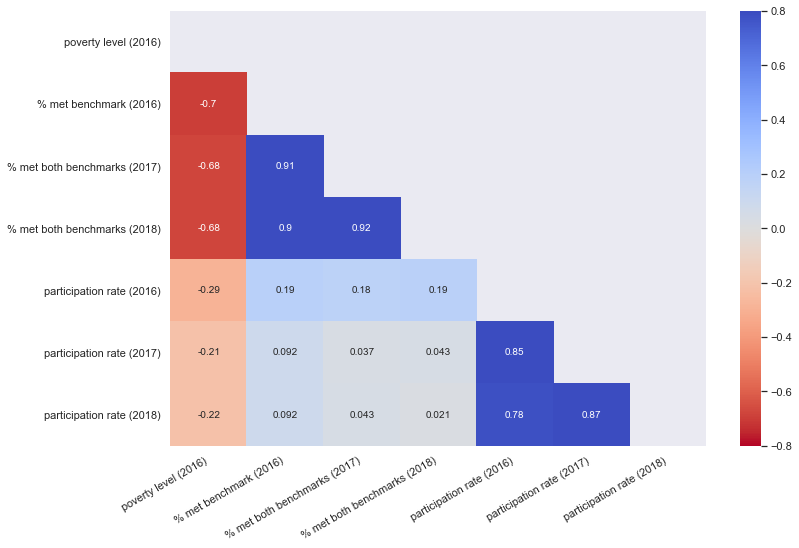

In [312]:
plt.subplots(figsize=(12,8))
mask = np.zeros_like(heatmapDF.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(heatmapDF.corr(), vmin = -.8, annot = True, vmax = .8, mask = mask, cmap= "coolwarm_r")
plt.xticks(rotation=30, ha="right")
plt.show()

###### 
**Analysis:** I parsed down this heatmap to the variables that were important. You can see very clearly in the red squares how negatively correlated poverty level and performance are. In all three years and it only decreased a little bit despite the overall passing percentage increasing. This indicates a moving benchmark, not improving performance. 
# 
# 

### 
### Plot the distributions of our different metrics to see if there's any non-normal characteristics:
### 

<ipython-input-313-66aa7e2d1846>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


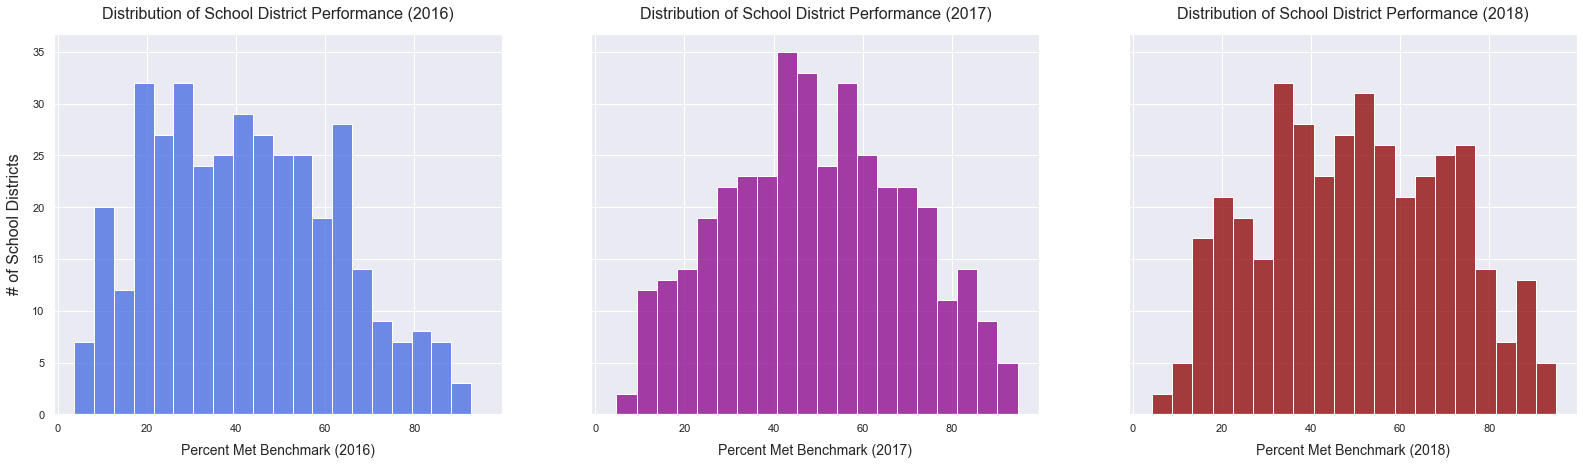

In [313]:
fig, axes = plt.subplots(1, 3, sharey = True, sharex = True, figsize=(18,7))
sns.histplot(ax=axes[0], data = heatmapDF['% met benchmark (2016)'], bins = 20, color = 'royalblue')
axes[0].set_title('Distribution of School District Performance (2016)', {'horizontalalignment': 'center'}, fontsize = 16, pad=15)
sns.set_theme(palette = 'Dark2')
axes[0].set_ylabel('# of School Districts', fontsize = 16)
axes[0].set_xlabel('Percent Met Benchmark (2016)', fontsize = 14)
axes[0].xaxis.labelpad = 10
axes[0].yaxis.labelpad = 10  
plt.subplots_adjust(left=None, bottom=None, right=1.3, top=None, wspace=None, hspace=None)

sns.histplot(ax=axes[1], data = heatmapDF['% met both benchmarks (2017)'], bins = 20, color = 'darkmagenta')
axes[1].set_title('Distribution of School District Performance (2017)', {'horizontalalignment': 'center'}, fontsize = 16, pad=15)
axes[1].set_xlabel('Percent Met Benchmark (2017)', fontsize = 14)
axes[1].xaxis.labelpad = 10

sns.histplot(ax=axes[2], data = heatmapDF['% met both benchmarks (2018)'], bins = 20, color = 'darkred')
axes[2].set_title('Distribution of School District Performance (2018)', {'horizontalalignment': 'center'}, fontsize = 16, pad=15)
axes[2].set_xlabel('Percent Met Benchmark (2018)', fontsize = 14)
axes[2].xaxis.labelpad = 10
fig.show()

###### 
**Analysis:** These histograms show a relatively normal distribution of school district performances although interesting to note that before the change and the 2nd new test both were slightly skewed left. This indicates a larger set of schools with less success.
# 
# 

<ipython-input-314-65f2662e065e>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


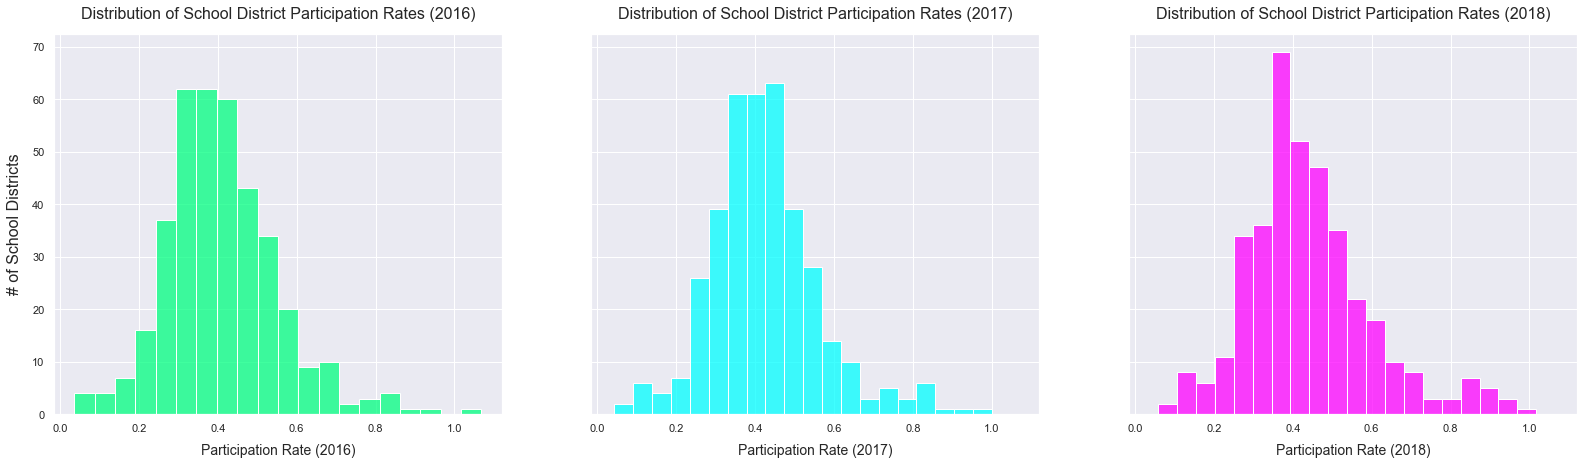

In [314]:
fig, axes = plt.subplots(1, 3, sharey = True, sharex = True, figsize=(18,7))
sns.histplot(ax=axes[0], data = heatmapDF['participation rate (2016)'], bins = 20, color = 'springgreen')
axes[0].set_title('Distribution of School District Participation Rates (2016)', {'horizontalalignment': 'center'}, fontsize = 16, pad=15)
sns.set_theme(palette = 'Set2')
axes[0].set_ylabel('# of School Districts', fontsize = 16)
axes[0].set_xlabel('Participation Rate (2016)', fontsize = 14)
axes[0].xaxis.labelpad = 10
axes[0].yaxis.labelpad = 10
plt.subplots_adjust(left=None, bottom=None, right=1.3, top=None, wspace=None, hspace=None)

sns.histplot(ax=axes[1], data = heatmapDF['participation rate (2017)'], bins = 20, color = 'cyan')
axes[1].set_title('Distribution of School District Participation Rates (2017)', {'horizontalalignment': 'center'}, fontsize = 16, pad=15)
axes[1].set_xlabel('Participation Rate (2017)', fontsize = 14)
axes[1].xaxis.labelpad = 10

sns.histplot(ax=axes[2], data = heatmapDF['participation rate (2018)'], bins = 20, color = 'fuchsia')
axes[2].set_title('Distribution of School District Participation Rates (2018)', {'horizontalalignment': 'center'}, fontsize = 16, pad=15)
axes[2].set_xlabel('Participation Rate (2018)', fontsize = 14)
axes[2].xaxis.labelpad = 10
fig.show()

###### 
**Analysis:** Participation rates are somewhat normally distributed with a slight right skew showing that there's just a few schools as the participation rate goes up. 
### 

# 
# 
### Plotting distributions side by side for comparison year by year using boxplots
###### 

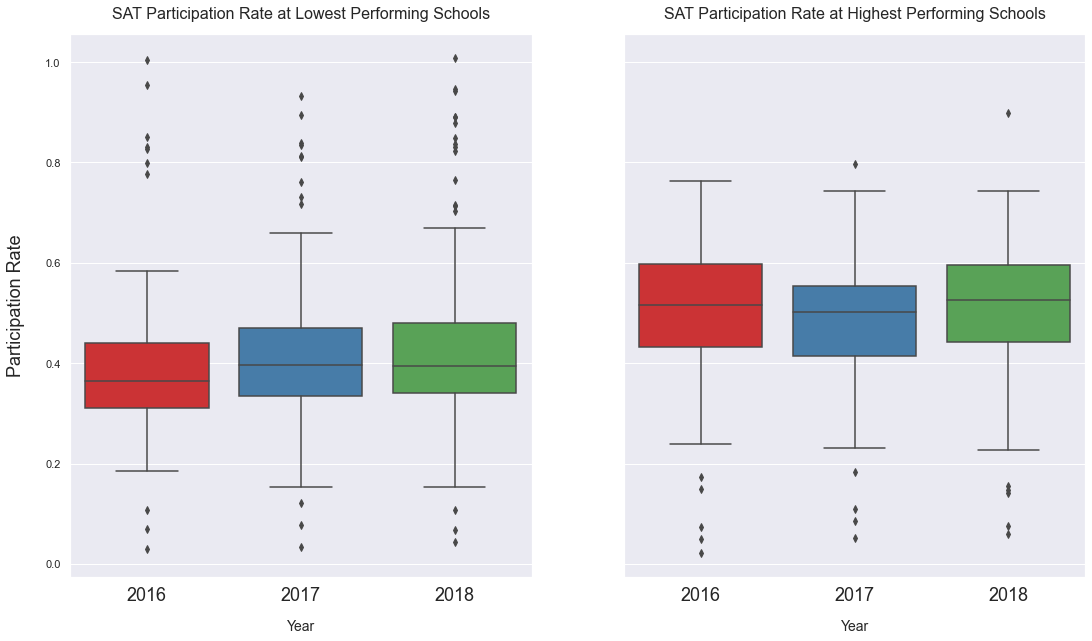

In [315]:
fig, axes = plt.subplots(1,2, sharey = True)
sns.boxplot(ax = axes[0], data = low_HS_participation, palette='Set1')
axes[0].set_xticklabels(['2016', '2017',  '2018'], fontsize = 18)
#axes[0].set_yticklabels(['', '0.0', '0.2', '0.4', '0.6', '0.8'], fontsize = 14)
axes[0].set_xlabel('Year', fontsize = 14)
axes[0].set_ylabel('Participation Rate', fontsize = 18)
axes[0].xaxis.labelpad = 15
axes[0].yaxis.labelpad = 20           # https://stackoverflow.com/questions/43875258/how-to-change-the-positions-of-subplot-titles-and-axis-labels-in-seaborn-facetgr

axes[0].set_title('SAT Participation Rate at Lowest Performing Schools', fontsize = 16, pad = 15)

sns.boxplot(ax = axes[1], data = top_HS_participation, palette='Set1')
fig.set_size_inches(12, 10)
axes[1].set_xticklabels(['2016', '2017',  '2018'], fontsize = 18)
#ax.set_yticklabels(['', '0.0', '0.2', '0.4', '0.6', '0.8'], fontsize = 14)
axes[1].set_xlabel('Year', fontsize = 14)
axes[1].xaxis.labelpad = 15
axes[1].yaxis.labelpad = 20           # https://stackoverflow.com/questions/43875258/how-to-change-the-positions-of-subplot-titles-and-axis-labels-in-seaborn-facetgr
axes[1].set_title('SAT Participation Rate at Highest Performing Schools', fontsize = 16, pad = 15)

plt.subplots_adjust(left=None, bottom=None, right=1.3, top=None, wspace=None, hspace=None)
plt.show()

###### 
**Analysis:** The difference here is pretty negligible. Participation rate increased negligibly for low performance schools and then flatlined while the high performance schools slightly decreased then stablilized. 
# 
# 

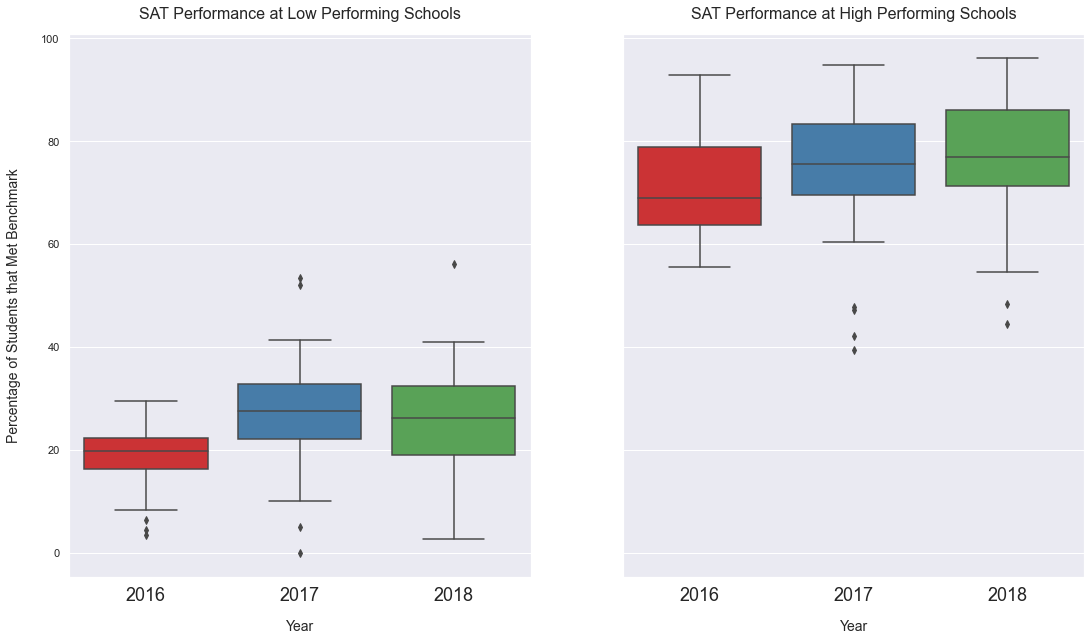

In [316]:
fig, axes = plt.subplots(1,2, sharey = True)
sns.boxplot(ax = axes[0], data = low_HS_met_benchmark, palette='Set1')
axes[0].set_xticklabels(['2016', '2017',  '2018'], fontsize = 18)
#axes[0].set_yticklabels(['', '0.0', '0.2', '0.4', '0.6', '0.8'], fontsize = 14)
axes[0].set_xlabel('Year', fontsize = 14)
axes[0].set_ylabel('Percentage of Students that Met Benchmark', fontsize = 14)
axes[0].xaxis.labelpad = 15
axes[0].yaxis.labelpad = 20           # https://stackoverflow.com/questions/43875258/how-to-change-the-positions-of-subplot-titles-and-axis-labels-in-seaborn-facetgr

axes[0].set_title('SAT Performance at Low Performing Schools', fontsize = 16, pad = 15)

sns.boxplot(ax = axes[1], data = top_HS_met_benchmark, palette='Set1')
fig.set_size_inches(12, 10)
axes[1].set_xticklabels(['2016', '2017',  '2018'], fontsize = 18)
#ax.set_yticklabels(['', '0.0', '0.2', '0.4', '0.6', '0.8'], fontsize = 14)
axes[1].set_xlabel('Year', fontsize = 14)
axes[1].xaxis.labelpad = 15
axes[1].yaxis.labelpad = 20           # https://stackoverflow.com/questions/43875258/how-to-change-the-positions-of-subplot-titles-and-axis-labels-in-seaborn-facetgr
axes[1].set_title('SAT Performance at High Performing Schools', fontsize = 16, pad = 15)

plt.subplots_adjust(left=None, bottom=None, right=1.3, top=None, wspace=None, hspace=None)
plt.show()

###### 
**Analysis:** At first glance, performance went up with the new test introduction but that's negated by the fact that higher performing schools also went up indicating a moving benchmark instead of school district improvement. The further increase in 2018 in high performing districts shows how those places had better prep year on year. 
# 
# 

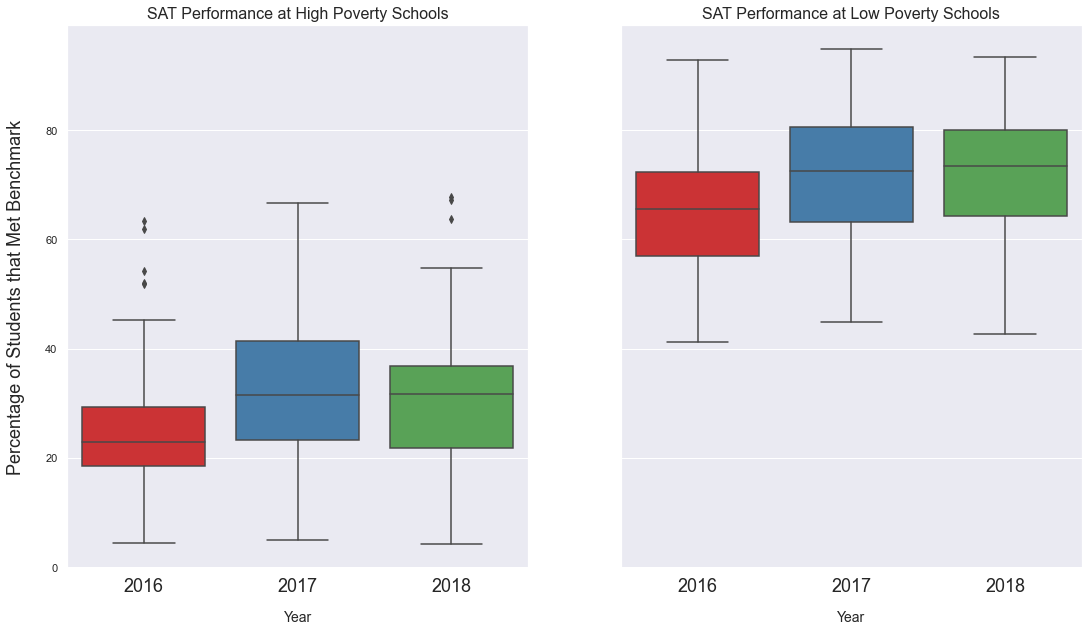

In [317]:
fig, axes = plt.subplots(1,2, sharey = True)
sns.boxplot(ax = axes[0], data = high_poverty_met_benchmark, palette='Set1')
axes[0].set_xticklabels(['2016', '2017',  '2018'], fontsize = 18)
#axes[0].set_yticklabels(['', '0.0', '0.2', '0.4', '0.6', '0.8'], fontsize = 14)
axes[0].set_xlabel('Year', fontsize = 14)
axes[0].set_ylabel('Percentage of Students that Met Benchmark', fontsize = 18)
axes[0].xaxis.labelpad = 15
axes[0].yaxis.labelpad = 20           # https://stackoverflow.com/questions/43875258/how-to-change-the-positions-of-subplot-titles-and-axis-labels-in-seaborn-facetgr

axes[0].set_title('SAT Performance at High Poverty Schools', fontsize = 16)

sns.boxplot(ax = axes[1], data = low_poverty_met_benchmark, palette='Set1')
fig.set_size_inches(12, 10)
axes[1].set_xticklabels(['2016', '2017',  '2018'], fontsize = 18)
#ax.set_yticklabels(['', '0.0', '0.2', '0.4', '0.6', '0.8'], fontsize = 14)
axes[1].set_xlabel('Year', fontsize = 14)
axes[1].xaxis.labelpad = 15
axes[1].yaxis.labelpad = 20           # https://stackoverflow.com/questions/43875258/how-to-change-the-positions-of-subplot-titles-and-axis-labels-in-seaborn-facetgr
axes[1].set_title('SAT Performance at Low Poverty Schools', fontsize = 16)

plt.subplots_adjust(left=None, bottom=None, right=1.3, top=None, wspace=None, hspace=None)
plt.show()

###### 
**Analysis:** Very similar to the previous graphs. The districts with high poverty levels had improved performance, but so did the districts with low poverty. That means the benchmark was easier to meet not more equal. 
# 
# 

<ipython-input-318-1da832f82c14>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(axes[0].get_yticks(), fontsize = 30)
<ipython-input-318-1da832f82c14>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['', '0.10', '0.20', '0.30', '0.40'], fontsize = 30)
<ipython-input-318-1da832f82c14>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(axes[1].get_yticks(), fontsize = 30)
<ipython-input-318-1da832f82c14>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(['', '0.10', '0.20', '0.30', '0.40'], fontsize = 30)
<ipython-input-318-1da832f82c14>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_yticklabels(axes[2].get_yticks(), fontsize = 25)
<ipython-input-318-1da832f82c14>:25: UserWarning: FixedFormatter should only be used together w

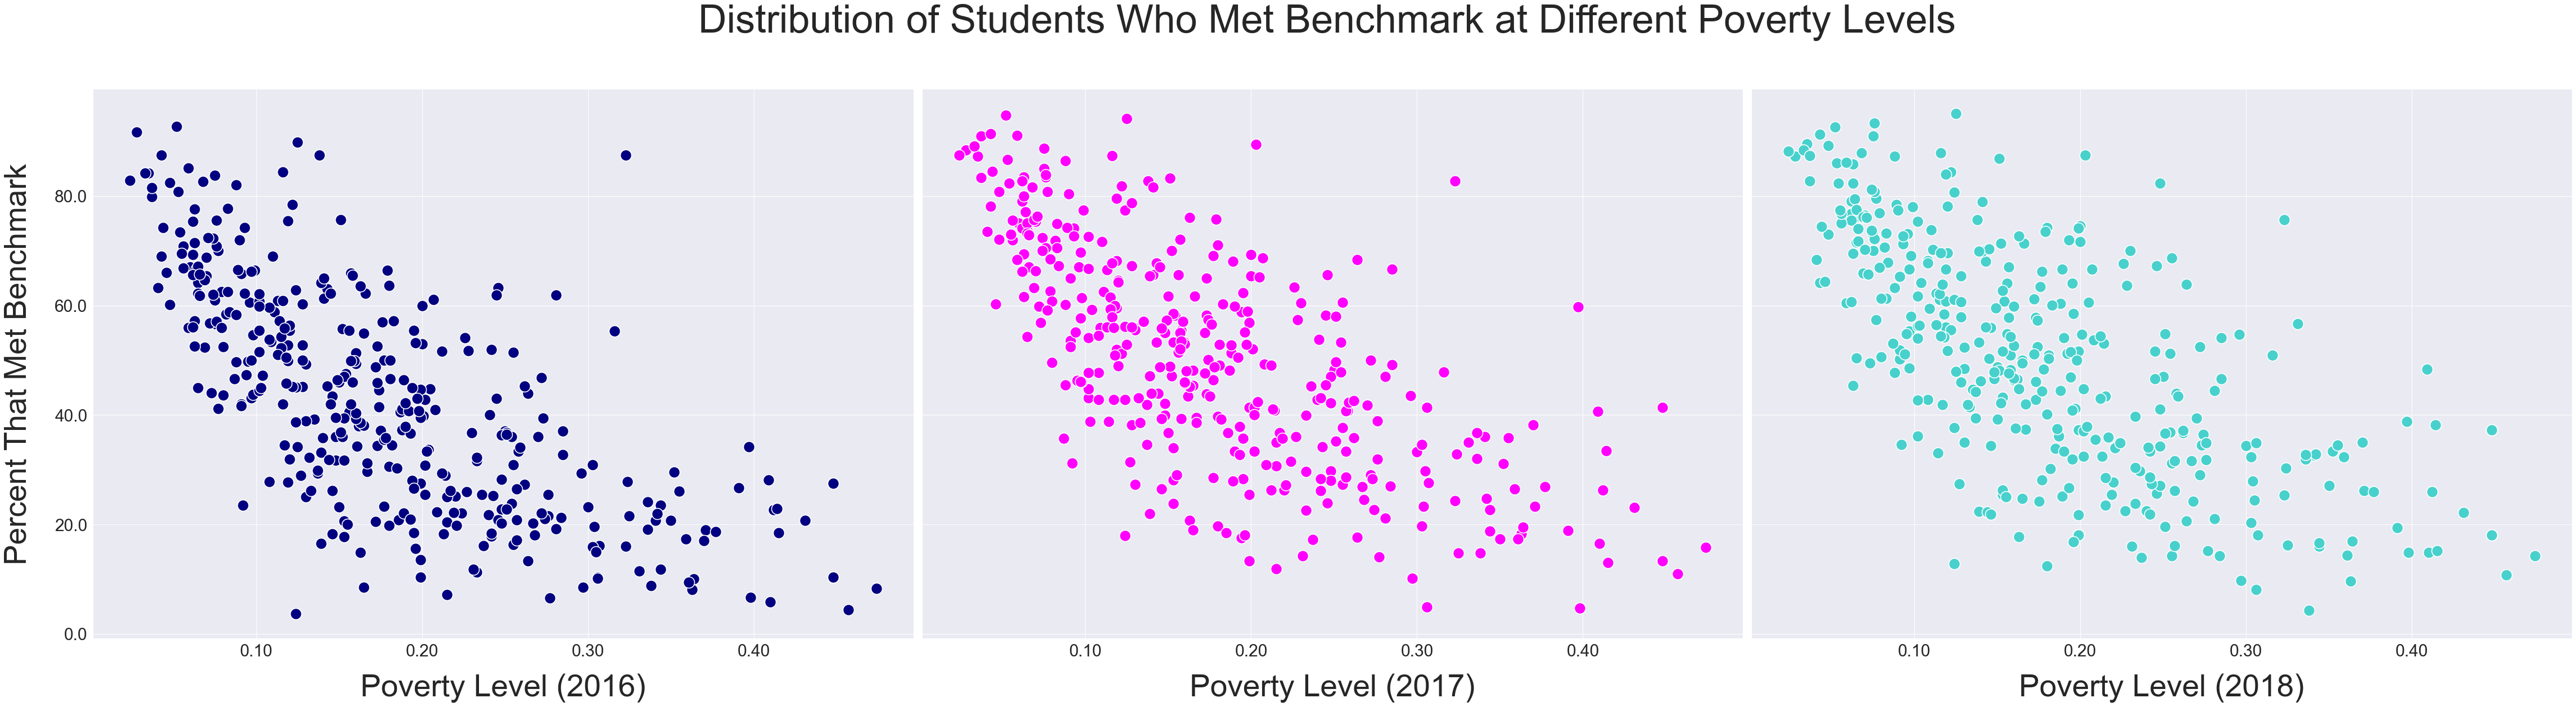

In [318]:
fig, axes = plt.subplots(1, 3, sharey = True)
fig.set_size_inches(70,18)
sns.scatterplot(ax = axes[0], y = merged_16_17_18['% met benchmark (2016)'], x = merged_16_17_18['poverty level (2016)'], palette='', color = 'navy', s = 400)
axes[0].set_xlabel('Poverty Level (2016)', fontsize = 55)
axes[0].set_yticklabels(axes[0].get_yticks(), fontsize = 30)
axes[0].set_xticklabels(['', '0.10', '0.20', '0.30', '0.40'], fontsize = 30)
axes[0].set_ylabel('Percent That Met Benchmark', fontsize = 55)
axes[0].xaxis.labelpad = 25
axes[0].yaxis.labelpad = 40           # https://stackoverflow.com/questions/43875258/how-to-change-the-positions-of-subplot-titles-and-axis-labels-in-seaborn-facetgr

axes[1].set_title('Distribution of Students Who Met Benchmark at Different Poverty Levels ', fontsize = 70, pad = 100)

sns.scatterplot(ax = axes[1], y = merged_16_17_18['% met both benchmarks (2017)'], x = merged_16_17_18['poverty level (2016)'], palette='', color = 'fuchsia', s = 400)
axes[1].set_xlabel('Poverty Level (2017)', fontsize = 55)
axes[1].set_ylabel('Percent That Met Benchmark', fontsize = 30)
axes[1].set_yticklabels(axes[1].get_yticks(), fontsize = 30)
axes[1].set_xticklabels(['', '0.10', '0.20', '0.30', '0.40'], fontsize = 30)
axes[1].xaxis.labelpad = 25
axes[1].yaxis.labelpad = 30

sns.scatterplot(ax = axes[2], y = merged_16_17_18['% met both benchmarks (2018)'], x = merged_16_17_18['poverty level (2016)'], palette='', s = 400, color = 'mediumturquoise')
axes[2].set_xlabel('Poverty Level (2018)', fontsize = 55)
axes[2].set_ylabel('Percent That Met Benchmark', fontsize = 30)
axes[2].set_yticklabels(axes[2].get_yticks(), fontsize = 25)
axes[2].set_xticklabels(['', '0.10', '0.20', '0.30', '0.40'], fontsize = 30)
axes[2].xaxis.labelpad = 25
axes[2].yaxis.labelpad = 30

plt.subplots_adjust(left=None, bottom=None, right=1, top=None, wspace=.01, hspace=None)
plt.show()

### 
**Analysis:** Very clearly shows the trend of lower performance as poverty level rises for all three years with no significant change even with the new test.
### 
## 
# 
# 
# 

#### 
## **Conclusions**
###### 
It is clear from the data that the SAT is still an unfair test. It repeatedly favors those in areas with less poverty and more resources. Despite the changes implemented to the SAT in 2017, by 2018 the status quo had returned. Such a heavily weighted part of higher education applications should not be reinforcing biases.
###### 
Some people may point to the fact that the amount of students passing the benchmark has increased in historically underperforming school districts. This is deceiving. Top performing school districts also significantly improved their performance at a similar rate. This shows us that College Board decreased the threshold for passing the test, not that it was more fair or equitable. 
###### 
This was all despite increasing participation rates, which many claim is the reason certain geographical areas perform worse. The participation rate increased. Performance did not. Socioeconomic factors such as poverty level are still the best indicators for predicting test performance.
## 
## 

###### 
## **Recommendations**
###### 

**1. Universities should, at a minimum, be test-optional.**

If they are truly committed to creating a diverse student body of those from different backgrounds, this is absolutely necessary. The SAT further stacks the deck against those who attend school in areas that are socioeconomically disadvantaged and discourages students from applying. Give these students a chance at success.

**2. Test-blind policies are the most equitable way to judge applications.**

By allowing some students to bolster their applications with tests but not others, you allow those students who submitted scores to tip the scale in their favor. Because these students disproportionately come from areas with more resources, it reinforces inequity. Further research needs to be done on the correlation between college success and other parts of the application as well as newly proposed application factors as well. Through that research we can find a better way to determine college success that is equitable for all people, no matter their background. 